## 4.4　単変量非線形変換

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

In [3]:
print(X_org.shape)
pd.DataFrame(X_org).head()

(1000, 3)


,0,1,2
0,1.764052,0.400157,0.978738
1,2.240893,1.867558,-0.977278
2,0.950088,-0.151357,-0.103219
3,0.410599,0.144044,1.454274
4,0.761038,0.121675,0.443863


In [4]:
pd.DataFrame(w)

,0
0,1.593274
1,0.568722
2,-0.114487


In [5]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [6]:
pd.DataFrame(X).head()

,0,1,2
0,56,18,27
1,81,57,3
2,25,9,11
3,20,13,30
4,27,13,13


In [7]:
pd.DataFrame(y).head()

,0
0,2.926144
1,4.744364
2,1.439488
3,0.569621
4,1.230924


In [8]:
print('Number of feature appearrances:\n{}'.format(np.bincount(X[:, 0])))

Number of feature appearrances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


上記の出力を、より見やすくすると下記になる。

In [9]:
pd.DataFrame(np.bincount(X[:, 0]), index=np.arange(141), columns=['出現回数']).head(10)

,出現回数
0,28
1,38
2,68
3,48
4,61
5,59
6,45
7,56
8,37
9,40


これらを可視化すると、下記になる。

Text(0.5, 0, 'value')

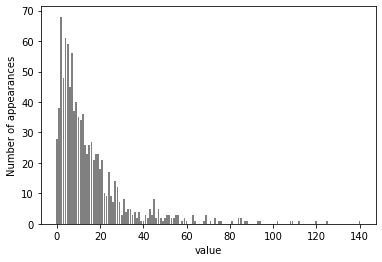

In [10]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('Number of appearances')
plt.xlabel('value')

Text(0.5, 0, 'value')

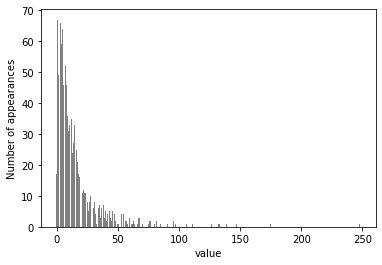

In [11]:
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('Number of appearances')
plt.xlabel('value')

Text(0.5, 0, 'value')

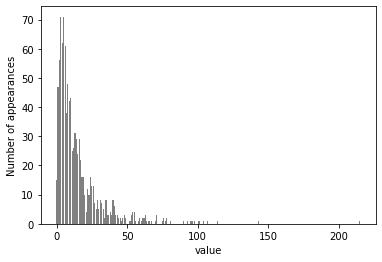

In [12]:
bins = np.bincount(X[:, 2])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('Number of appearances')
plt.xlabel('value')

この種の値の分布（小さい値が多く、まれにとても大きな値がある）は実データによく出現するが<br>
線形モデルでは扱えないため、リッジ回帰で学習させてみる。

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.622


ここで対数変換を使ってみる。

In [14]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

対数変換後は、データ分散に非対称性が少なく、非常に大きい外れ値はなくなっている。

Text(0.5, 0, 'Value')

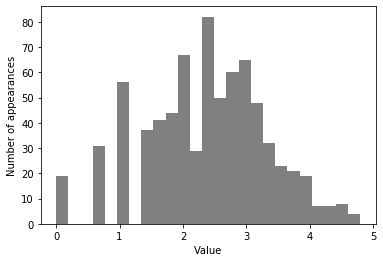

In [16]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel('Number of appearances')
plt.xlabel('Value')

対数変換後の特徴量X[0]の値のヒストグラム

In [17]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)

print('Test score: {:.3f}'.format(score))

Test score: 0.875


こういった対数変換は、線形モデルにおいて最も効果を発揮することが多い。